In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Z test
### Similar to T test but the distribution follows
### z or normal distribution if the sample size is >= 30

In [19]:
from scipy.stats import norm

### Generating a Population

In [98]:
pop_mean=25
pop_std=30
pop_size=1_00_000

In [99]:
np.random.seed(123)
pop=np.random.normal(loc=pop_mean,
                     scale=pop_std,size=pop_size)
print(pop[:10])

[ -7.5689181   54.9203634   33.48935494 -20.18884142   7.64199244
  74.54309611 -47.8003773   12.13262113  62.97808776  -1.00221207]


### Extracting a sample

In [100]:
sample_size=500
np.random.seed(123)
sample=np.random.choice(pop,size=sample_size)
print(sample[:10])

[ 31.0199469  109.59719132  29.49145446 -15.75025585  19.19351326
  62.30673661  -7.81839642  39.48893064  16.41863051 -14.84027253]


D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


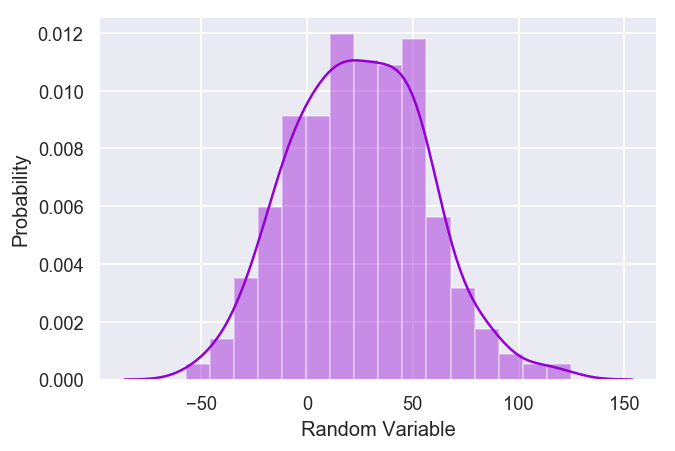

In [101]:
plt.figure(dpi=120)
sns.distplot(sample, color='darkviolet')
plt.xlabel("Random Variable")
plt.ylabel("Probability");

# Q Does the sample have the Characterstics of the Population
### Is the mean of the Sample equal to the mean of the population

In [102]:
sample_mean=np.mean(sample)
sample_std=np.std(sample,ddof=1)
n=len(sample)
dof=n-1
cl=0.95
significant=0.05
print("Population Mean",pop_mean)
print("No of Samples",n)
print("Sample Mean",sample_mean)
print("Sample Standard Deviation",sample_std)
print("Degree of Freedom",dof)
print("Confidence level",cl)
print("Significant level",significant)

Population Mean 25
No of Samples 500
Sample Mean 24.547698264765508
Sample Standard Deviation 31.585202206069766
Degree of Freedom 499
Confidence level 0.95
Significant level 0.05


### Calculation of Standard Error

In [103]:
SE = np.std(pop)/ np.sqrt(n)
print("Standard Error ",SE)

Standard Error  1.3410641183552665


### Z Score

In [104]:
z_score = (sample_mean - pop_mean)/SE
z_score

-0.337270775531011

### Z Critical

In [105]:
zcritical=np.array([norm.ppf(significant/2) , -norm.ppf(significant/2)])
print("Zcritical Values",zcritical)

Zcritical Values [-1.95996398  1.95996398]


### Confidence Interval

In [106]:
CI = sample_mean + SE*zcritical
print("Confidence Intervals are ",CI)

Confidence Intervals are  [21.91926089 27.17613564]


In [107]:
from scipy.stats import gaussian_kde

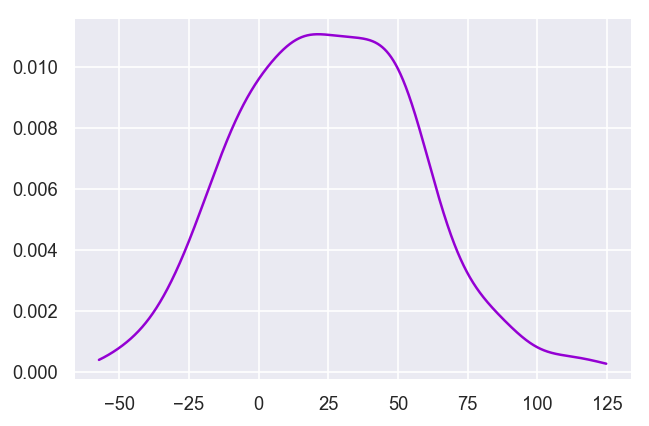

In [108]:
plt.figure(dpi=120)
kde = gaussian_kde(sample)
pos = np.linspace(np.min(sample), np.max(sample), 10000)
plt.plot(pos, kde(pos), color='darkviolet')
plt.show()

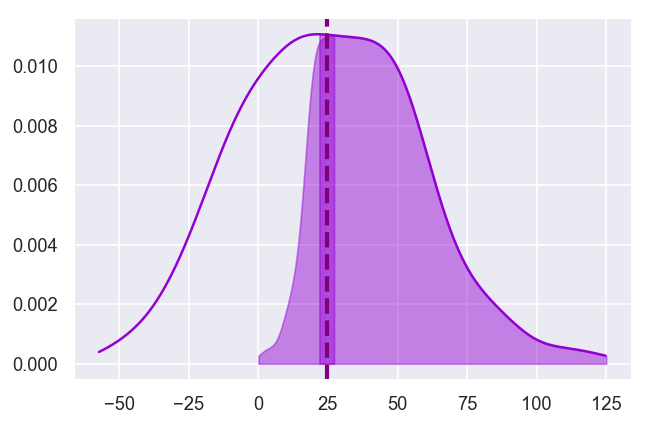

In [115]:
plt.figure(dpi=120)
kde = gaussian_kde(sample)
pos = np.linspace(np.min(sample), np.max(sample), 10000)
plt.plot(pos, kde(pos), color='darkviolet')
shade = np.linspace(CI[0], 125, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='darkviolet')
shade2 = np.linspace(CI[1], 0, 300)
plt.fill_between(shade2, kde(shade), alpha=0.45, color='darkviolet')
plt.axvline(x=sample_mean, linestyle='--', linewidth=2.5, label="sample mean with Joe personal trainer", c='purple')
plt.show()